# Predicting the final grade of a student

The data used is from a Portuguese secondary school. The data includes academic and personal characteristics of the students as well as final grades. The task is to predict the final grade from the student information. (K Means Clustering)

# K Means Clustering Implementation in python

### Import the relevent Modules

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [40]:
student = pd.read_csv('student-mat.csv')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [41]:
pd.set_option('display.float', '{:.2f}'.format)
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


In [42]:
categorical_col = []
for column in student.columns:
    if student[column].dtype == object and len(student[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {student[column].unique()}")
        print("====================================")
    else:
        x=column
        student[x] = student[x].astype("category").cat.codes
        print(f"{column} : {student[column].unique()}")
        print("====================================")

school : ['GP' 'MS']
sex : ['F' 'M']
age : [3 2 0 1 4 7 5 6]
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Medu : [4 1 3 2 0]
Fedu : [4 1 2 3 0]
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
traveltime : [1 0 2 3]
studytime : [1 2 0 3]
failures : [0 3 2 1]
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']
famrel : [3 4 2 0 1]
freetime : [2 1 3 0 4]
goout : [3 2 1 0 4]
Dalc : [0 1 4 2 3]
Walc : [0 2 1 3 4]
health : [2 4 0 1 3]
absences : [ 6  4 10  2  0 16 14  7  8 25 12 31 18 26 20 32 24 27  5 13 15 22  3 21
  1 33 28 19  9 11 29 30 23 17]
G1 : [ 2  4 12  3  9 13 11  7 10  5  8  6 14 16 15  1  0]
G2 : [ 3  2  5 11  7 12  9 15 13 10  6  8  4 16 14  1  0]
G3 : [ 3  7 12  8 16  6  9 11

###  Exploratory Data Analysis (EDA)

In [43]:
columns_names=student.columns.to_list()

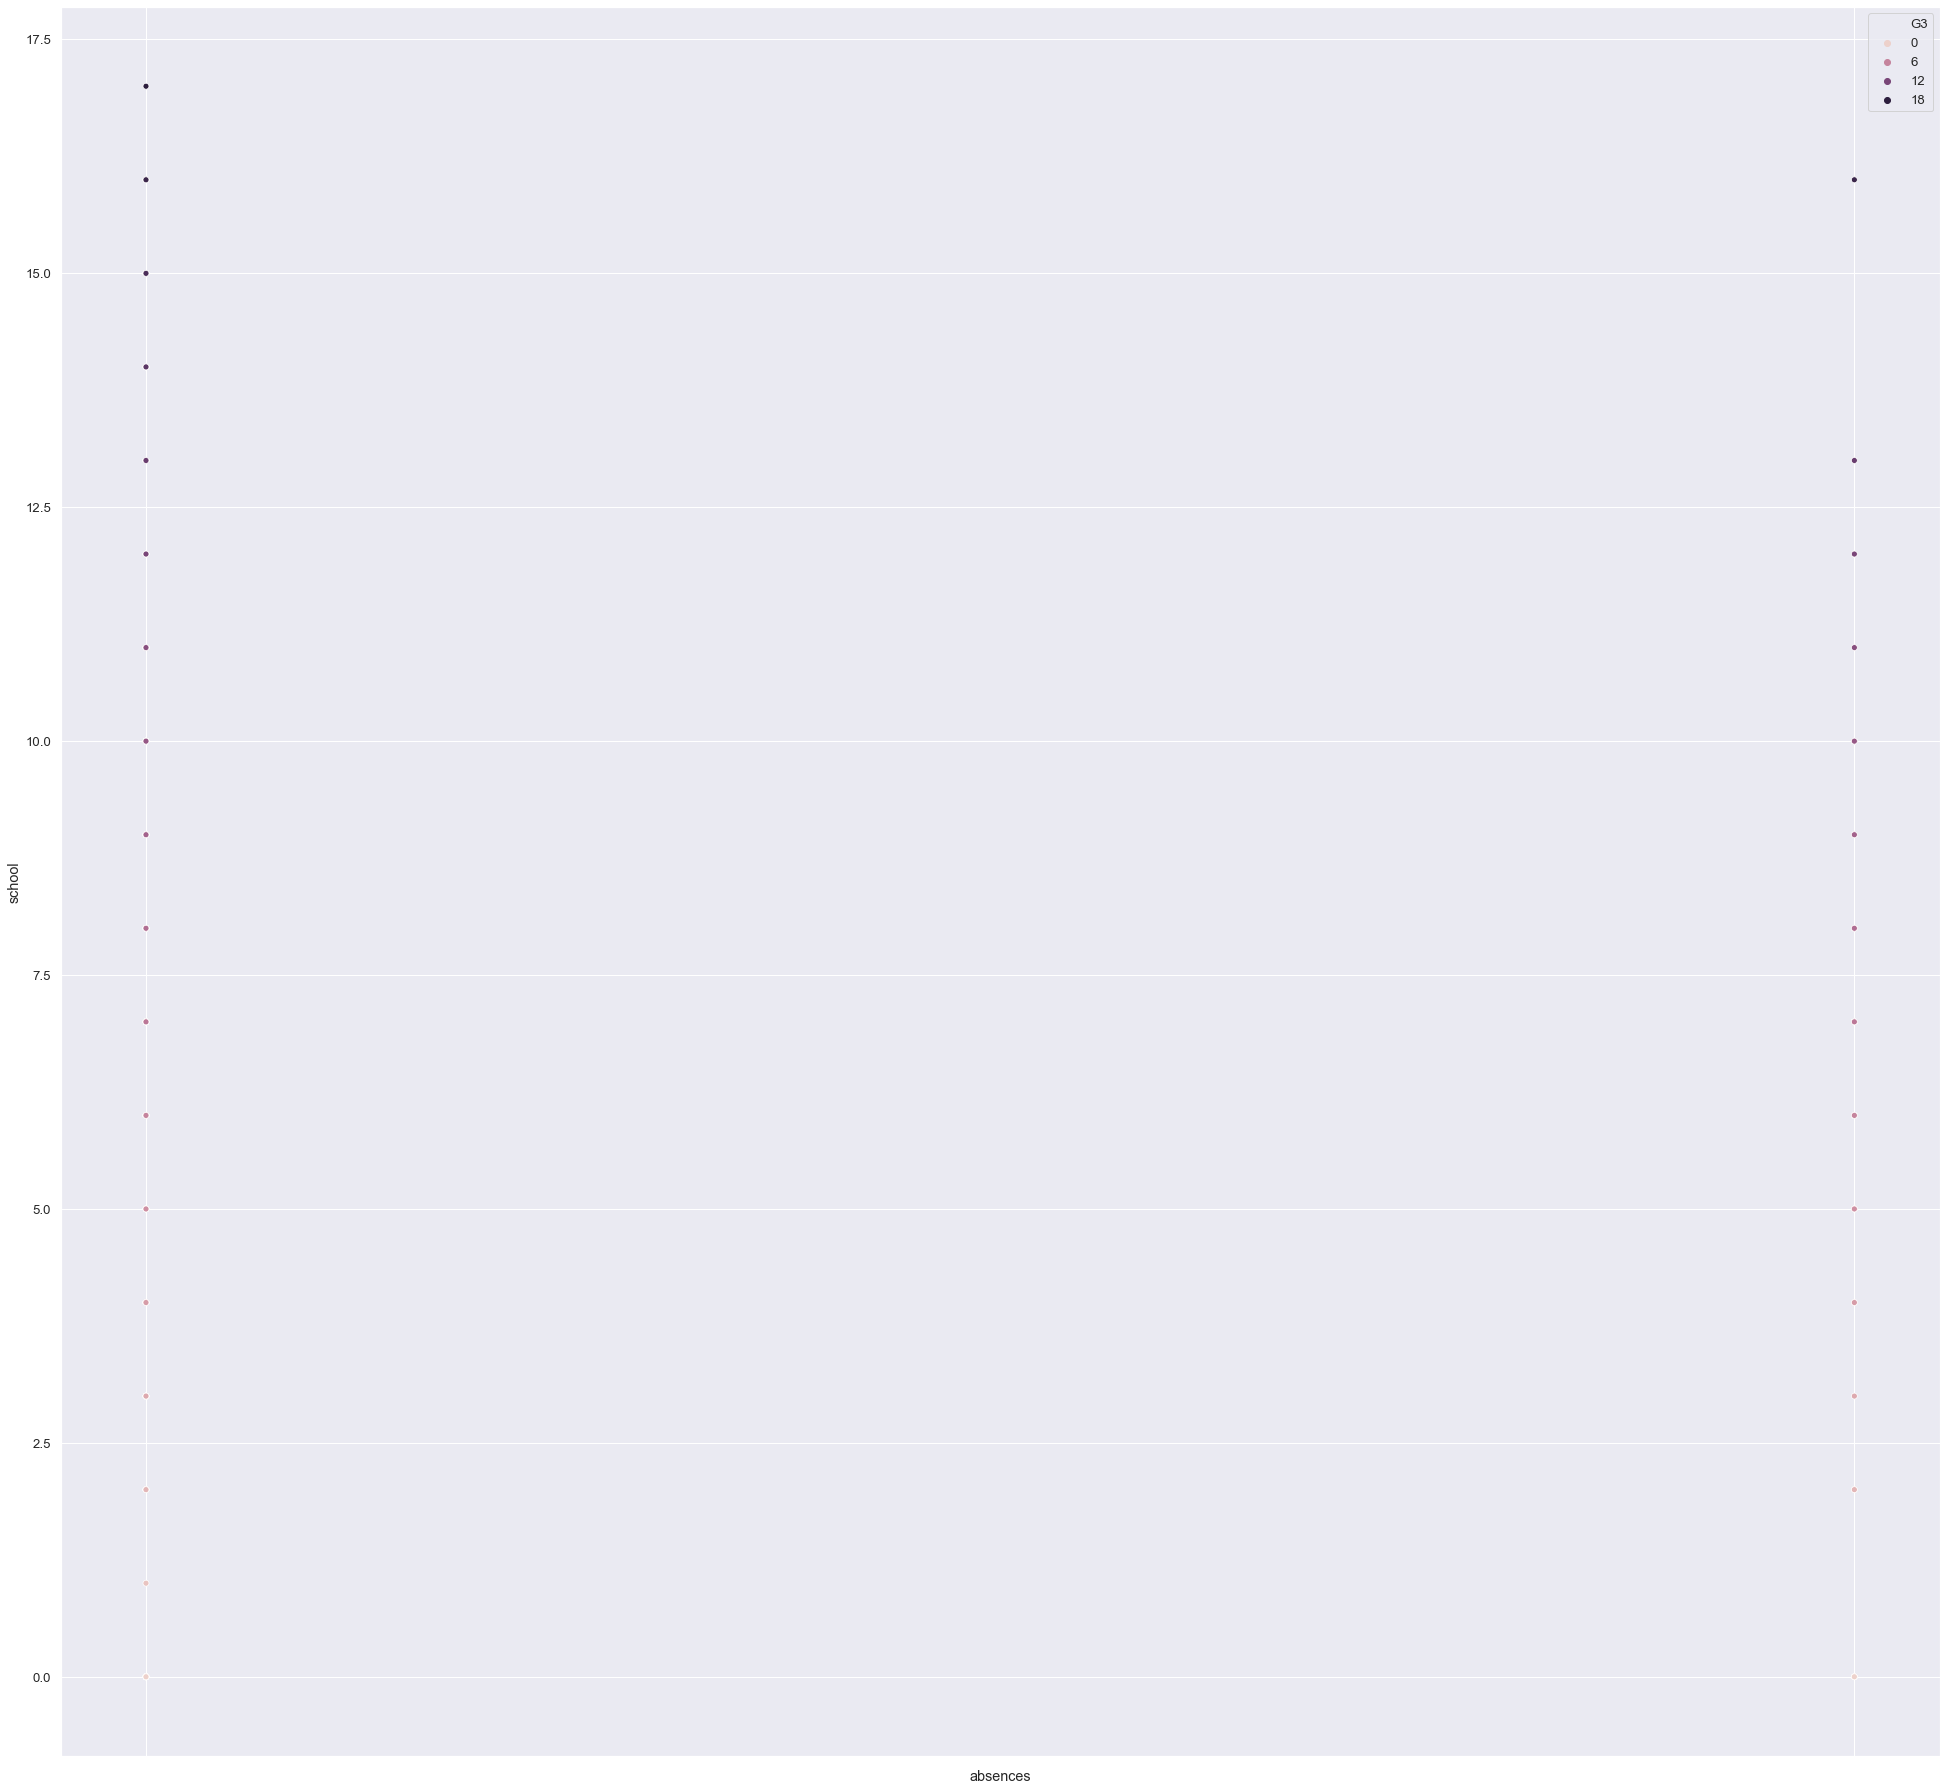

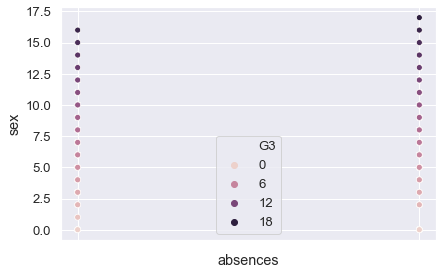

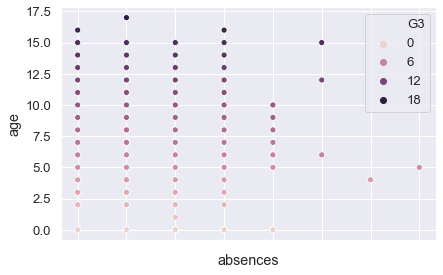

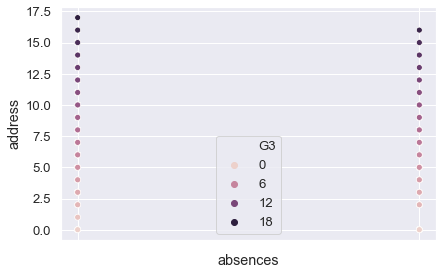

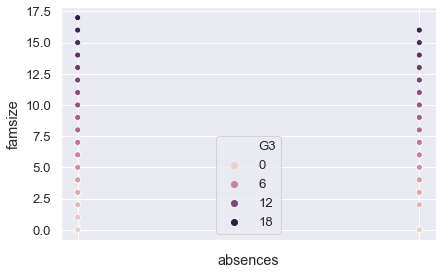

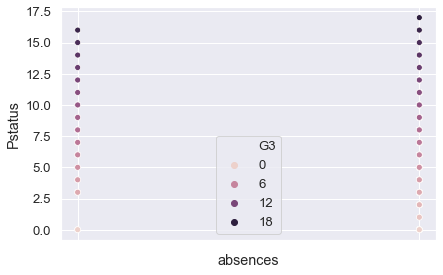

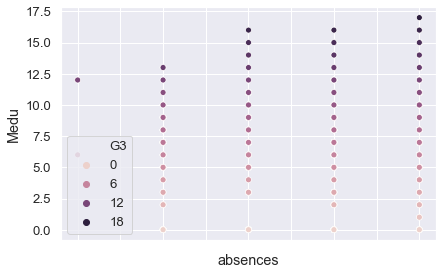

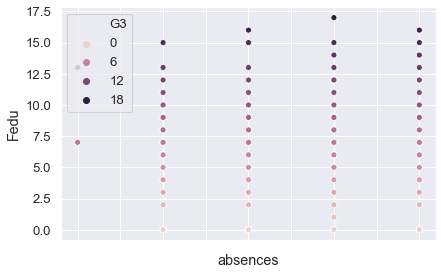

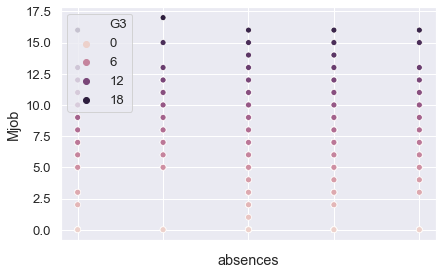

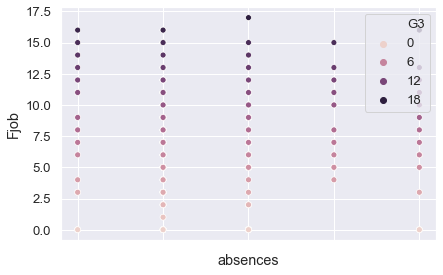

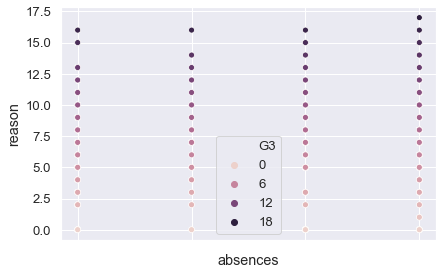

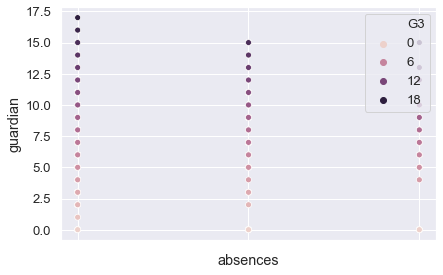

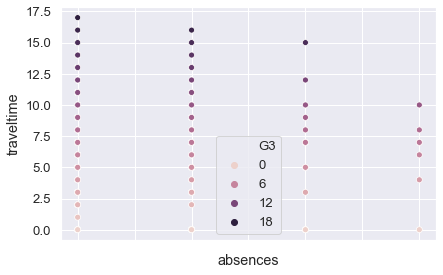

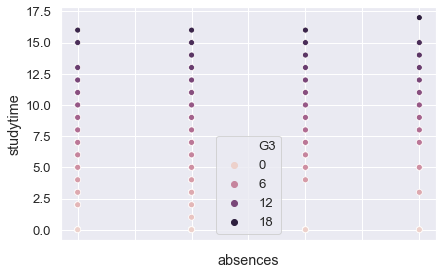

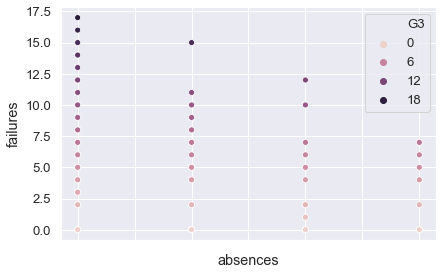

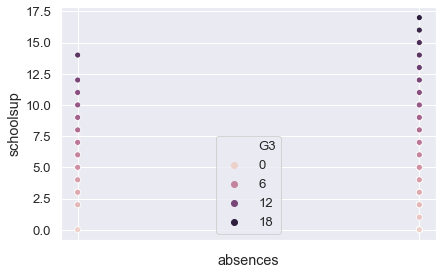

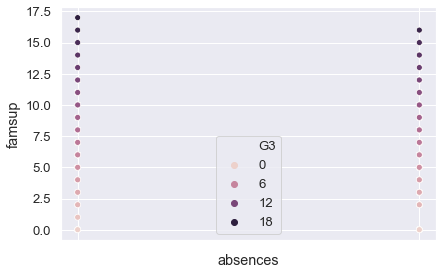

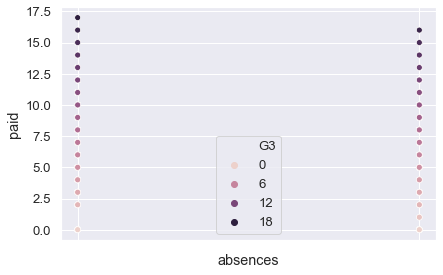

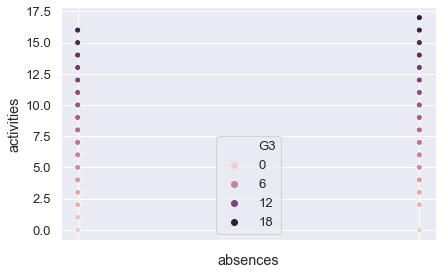

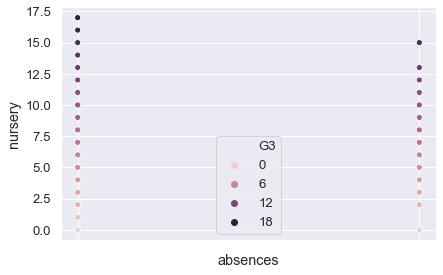

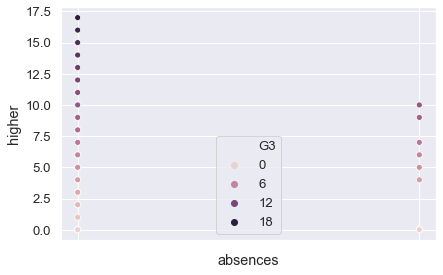

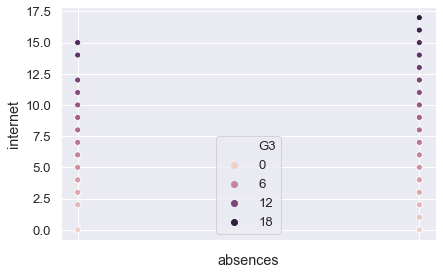

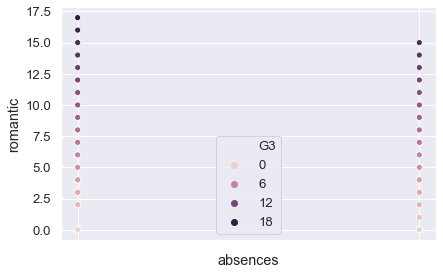

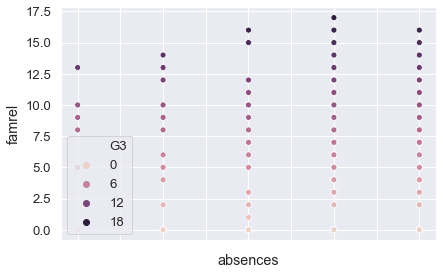

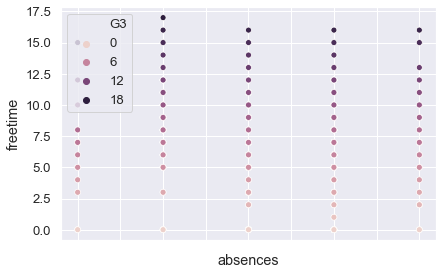

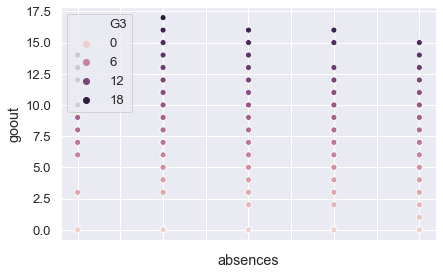

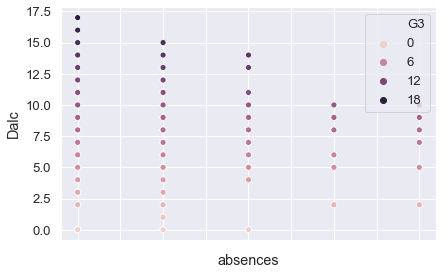

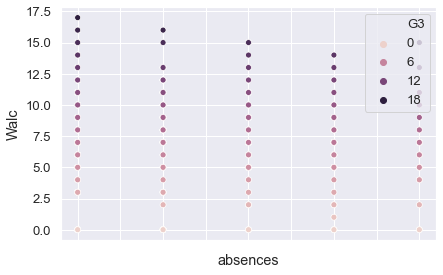

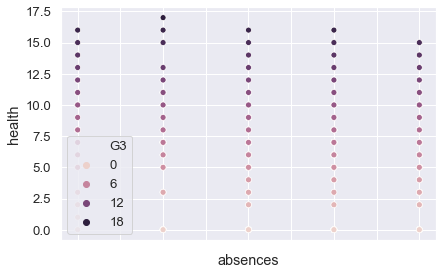

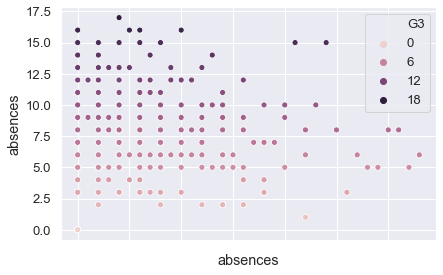

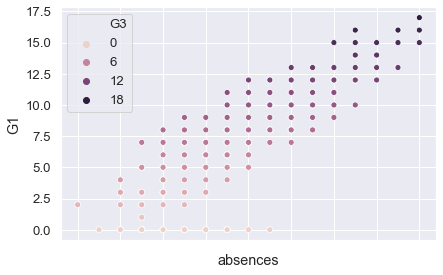

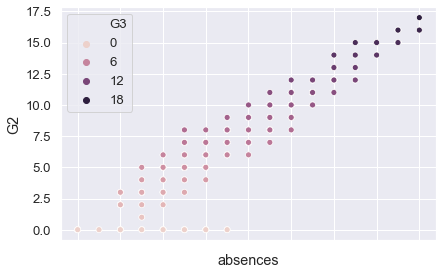

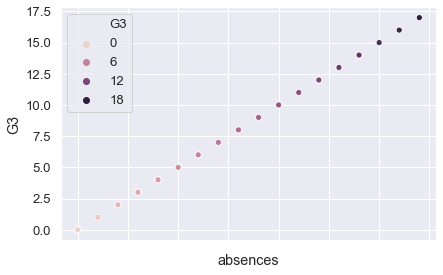

In [44]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i in range(0,len(columns_names)):
    
    #sns.scatterplot(columns_names[i], columns_names[j], data=student)

    g = sns.scatterplot(columns_names[i], 'G3', data=student,hue='G3')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel(columns_names[i])
    plt.xlabel(columns_names[j])
    plt.show()

### DATA PRE-PROCESSING

In [61]:
student.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [62]:
student.corr()['G3'].sort_values()

failures     -0.36
age          -0.16
goout        -0.15
traveltime   -0.12
Walc         -0.08
Dalc         -0.07
health       -0.07
absences      0.00
freetime      0.01
famrel        0.05
studytime     0.11
Fedu          0.16
Medu          0.22
G1            0.85
G2            0.94
G3            1.00
Name: G3, dtype: float64

In [63]:
# Select only categorical variables
category_df = student.select_dtypes(include=['object'])

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the grade back in the dataframe
dummy_df['G3'] = student['G3']

# Find correlations with grade
dummy_df.corr()['G3'].sort_values()

higher_no           -0.18
romantic_yes        -0.12
schoolsup_yes       -0.12
Mjob_at_home        -0.12
address_R           -0.12
Mjob_other          -0.11
sex_F               -0.11
internet_no         -0.11
reason_course       -0.09
guardian_other      -0.09
paid_no             -0.08
famsize_GT3         -0.08
Fjob_other          -0.06
Pstatus_T           -0.05
school_MS           -0.05
nursery_no          -0.05
famsup_yes          -0.05
activities_no       -0.02
reason_home         -0.02
Fjob_services       -0.02
Fjob_at_home        -0.01
guardian_mother      0.02
activities_yes       0.02
guardian_father      0.03
reason_other         0.04
famsup_no            0.05
nursery_yes          0.05
Fjob_health          0.05
school_GP            0.05
Pstatus_A            0.05
Mjob_teacher         0.06
famsize_LE3          0.08
paid_yes             0.08
Mjob_services        0.09
reason_reputation    0.09
internet_yes         0.11
sex_M                0.11
Fjob_teacher         0.11
address_U   

In [64]:
# selecting the most correlated values and dropping the others
labels = student['G3']

# drop the school and grade columns
student = student.drop(['school', 'G1', 'G2'], axis='columns')
    
# One-Hot Encoding of Categorical Variables
student = pd.get_dummies(student)


In [66]:
# Find correlations with the Grade
most_correlated = student.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

student = student.loc[:, most_correlated.index]
student.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,Mjob_health
0,3,0,4,1,0,3,4,3,0
1,3,0,1,1,0,2,1,2,0
2,7,3,1,1,0,0,1,1,0
3,12,0,4,1,0,0,2,1,1
4,7,0,3,1,0,1,3,1,0


### K Means Cluster Creation

In [67]:
from sklearn.cluster import KMeans

In [68]:
student['G3'] = student.G3.astype("category").cat.codes

In [69]:
number_of_clusters=student.G3.to_list()

In [70]:
number_of_clusters=len(set(number_of_clusters))

In [71]:
number_of_clusters

18

In [76]:
kmeans = KMeans(number_of_clusters)
student

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,Mjob_health
0,3,0,4,1,0,3,4,3,0
1,3,0,1,1,0,2,1,2,0
2,7,3,1,1,0,0,1,1,0
3,12,0,4,1,0,0,2,1,1
4,7,0,3,1,0,1,3,1,0
...,...,...,...,...,...,...,...,...,...
390,6,2,2,1,0,5,2,3,0
391,13,0,3,1,0,2,1,4,0
392,4,3,1,1,0,6,1,2,0
393,7,0,3,1,0,3,2,0,0


In [77]:
kmeans.fit(student.drop('G3', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=18, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
kmeans.cluster_centers_

array([[ 1.60000000e+00,  2.20000000e+00,  7.00000000e-01,
         3.00000000e-01,  1.30000000e+00,  1.90000000e+00,
         6.00000000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  3.65517241e+00,  1.00000000e+00,
        -3.46944695e-17,  6.89655172e-01,  1.89655172e+00,
         1.75862069e+00,  1.72413793e-01],
       [ 4.00000000e-01,  1.40000000e+00,  8.00000000e-01,
         2.00000000e-01,  2.90000000e+00,  3.10000000e+00,
         2.60000000e+00,  0.00000000e+00],
       [ 1.66666667e-01,  3.66666667e+00,  1.00000000e+00,
        -3.46944695e-17,  2.66666667e+00,  3.46666667e+00,
         3.40000000e+00,  2.00000000e-01],
       [ 3.12500000e-02,  2.50000000e+00,  1.00000000e+00,
        -3.46944695e-17,  1.28125000e+00,  3.25000000e+00,
         1.56250000e+00,  6.25000000e-02],
       [ 1.20000000e+00,  2.40000000e+00,  0.00000000e+00,
         1.00000000e+00,  3.20000000e+00,  1.60000000e+00,
         3.60000000e+00,  0.00000000e+00],
       [ 3.60000000e-01,  1.160000

In [79]:
student['G3'] = student.G3.astype("category").cat.codes

In [80]:
student.G3

0       3
1       3
2       7
3      12
4       7
       ..
390     6
391    13
392     4
393     7
394     6
Name: G3, Length: 395, dtype: int8

In [82]:
student.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,Mjob_health
0,3,0,4,1,0,3,4,3,0
1,3,0,1,1,0,2,1,2,0
2,7,3,1,1,0,0,1,1,0
3,12,0,4,1,0,0,2,1,1
4,7,0,3,1,0,1,3,1,0


In [83]:
kmeans.labels_


array([ 3,  6, 16,  1,  4,  7, 11,  8,  1,  7,  7,  9,  7,  7,  9,  8,  8,
        4, 16,  1,  7,  7,  1, 11,  4,  0,  9,  1,  4, 13,  7,  7,  7,  7,
        1,  9,  7,  8,  7,  9,  9,  7,  7,  9,  9,  7, 13,  7,  1, 13,  9,
        1, 13, 13, 13, 11,  7,  7,  9,  1,  8, 11,  9, 13, 13,  1,  7,  1,
        9,  1,  1,  1, 16,  1,  4,  7,  1,  9,  0,  4,  4,  4,  1,  9,  9,
       13, 11,  1,  0,  8,  4, 13,  1,  1, 11,  9,  1, 11,  8, 13, 13,  8,
        7, 13, 13,  7,  9,  4, 13, 13,  7,  4,  0,  1,  9,  8,  7,  4,  2,
        7,  9, 11,  4,  8, 11, 13,  7, 12, 14, 13,  7,  9, 11,  7,  7,  7,
        3,  0, 11,  7,  7, 16,  7, 11, 16,  9, 16,  9,  7, 16, 12, 11,  0,
        5, 10, 13, 17, 12,  9, 13,  0, 16, 11,  2, 12,  0, 11,  1, 11,  7,
       13,  9,  8, 16, 13,  3, 11,  3,  1,  8,  1,  4,  4,  4,  1,  3,  9,
        9,  4, 17,  4,  6, 11,  4,  4,  4,  8, 13,  8,  7, 13,  4, 11, 17,
       11,  8, 16,  7,  9, 10, 14,  3, 11, 15, 10, 15,  3,  3,  4, 17, 11,
       11,  4, 17,  7, 15

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(student.G3, kmeans.labels_))
print(classification_report(student.G3, kmeans.labels_))

[[4 0 1 3 0 3 3 5 1 1 0 3 1 2 2 2 3 4]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 1 2 0 2 0]
 [0 3 0 2 0 0 1 1 2 2 0 2 0 1 0 0 0 1]
 [0 0 0 0 0 0 1 0 1 0 1 0 2 1 0 1 2 0]
 [1 1 2 4 4 2 1 0 0 3 1 3 2 3 1 4 0 0]
 [0 1 0 6 2 0 3 1 2 4 1 0 1 2 3 0 1 1]
 [3 5 4 1 8 0 4 2 3 3 5 5 1 3 0 3 2 4]
 [0 0 0 5 4 0 3 6 3 7 3 5 0 3 2 1 0 5]
 [1 1 1 1 3 0 4 5 1 2 1 4 0 2 1 0 0 4]
 [1 2 1 2 4 0 3 2 3 2 2 1 0 2 2 1 0 3]
 [0 4 1 1 2 0 0 5 5 0 1 3 0 0 0 2 0 3]
 [0 6 0 1 1 0 1 7 5 5 2 1 0 0 1 2 0 1]
 [0 4 0 1 0 0 1 1 2 2 2 0 0 2 0 1 0 0]
 [0 0 0 1 2 0 0 1 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 2 1 1 1 0 0 3 1 0 0 2]
 [0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.40      0.11      0.17        38
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7
           3       0.07      0.13      0.09        15
           4       0.00   

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(student.G3, kmeans.labels_))
print(classification_report(student.G3, kmeans.labels_))

[[4 0 1 3 0 3 3 5 1 1 0 3 1 2 2 2 3 4]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 1 2 0 2 0]
 [0 3 0 2 0 0 1 1 2 2 0 2 0 1 0 0 0 1]
 [0 0 0 0 0 0 1 0 1 0 1 0 2 1 0 1 2 0]
 [1 1 2 4 4 2 1 0 0 3 1 3 2 3 1 4 0 0]
 [0 1 0 6 2 0 3 1 2 4 1 0 1 2 3 0 1 1]
 [3 5 4 1 8 0 4 2 3 3 5 5 1 3 0 3 2 4]
 [0 0 0 5 4 0 3 6 3 7 3 5 0 3 2 1 0 5]
 [1 1 1 1 3 0 4 5 1 2 1 4 0 2 1 0 0 4]
 [1 2 1 2 4 0 3 2 3 2 2 1 0 2 2 1 0 3]
 [0 4 1 1 2 0 0 5 5 0 1 3 0 0 0 2 0 3]
 [0 6 0 1 1 0 1 7 5 5 2 1 0 0 1 2 0 1]
 [0 4 0 1 0 0 1 1 2 2 2 0 0 2 0 1 0 0]
 [0 0 0 1 2 0 0 1 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 2 1 1 1 0 0 3 1 0 0 2]
 [0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.40      0.11      0.17        38
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7
           3       0.07      0.13      0.09        15
           4       0.00   

In [91]:
algorithm = (KMeans(n_clusters = 18 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )

algorithm.fit(student.drop('G3', axis=1))
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [92]:
centroids3

array([[ 4.87804878e-02,  3.78048780e+00,  9.75609756e-01,
         2.43902439e-02,  2.92682927e-01,  3.80487805e+00,
         1.39024390e+00,  9.75609756e-02],
       [ 2.59259259e-01,  1.62962963e+00,  9.62962963e-01,
         3.70370370e-02,  1.33333333e+00,  1.59259259e+00,
         3.33333333e+00,  3.70370370e-02],
       [ 8.82352941e-01,  2.94117647e+00,  1.00000000e+00,
        -2.08166817e-17,  3.70588235e+00,  2.35294118e+00,
         1.82352941e+00,  5.88235294e-02],
       [ 1.25000000e-01,  1.75000000e+00,  9.16666667e-01,
         8.33333333e-02,  2.45833333e+00,  2.91666667e+00,
         2.00000000e+00,  0.00000000e+00],
       [ 2.43902439e-02,  3.56097561e+00,  1.00000000e+00,
        -3.46944695e-17,  1.04878049e+00,  2.60975610e+00,
         1.68292683e+00,  2.19512195e-01],
       [ 1.53846154e-01,  2.11538462e+00,  1.00000000e+00,
        -3.46944695e-17,  4.61538462e-01,  2.42307692e+00,
         1.19230769e+00,  3.84615385e-02],
       [ 3.20000000e-01,  1.200000

In [103]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [105]:
student['G3'] =  labels3
trace1 = go.Scatter3d(
    x= student['failures'],
    y= student['goout'],
    z= student['age'],
    mode='markers',
     marker=dict(
        color = student['G3'], 
        size= 20,
        line=dict(
            color= student['G3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    #     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
        
            xaxis = dict(title  = 'failures'),
            yaxis = dict(title  = 'goout'),
            zaxis = dict(title  = 'age')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)